<a href="https://colab.research.google.com/github/daniui/Machine-Learning-Project/blob/main/airnology%203.0%202024/train_airnology_rawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
SEED = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures, MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, balanced_accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model, svm, tree, ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb
from catboost import EFeaturesSelectionAlgorithm

from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import make_pipeline as make_ImbPipeline
from imblearn import ensemble as Imbensemble

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Data Loading

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/lomba airnology 2024/objective-quest-dataquest-part-of-airnology/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/lomba airnology 2024/objective-quest-dataquest-part-of-airnology/test.csv')
train_df

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.000000,...,0.0,0.0,NaN,0.000000e+00,8.988380e+01,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,...,0.0,0.0,0.0,0.000000e+00,3.314018e+01,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.750000,...,NaN,0.0,NaN,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.000000,...,NaN,0.0,0.0,0.000000e+00,2.424884e+04,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.000000e+00,2.758002e+04,0.000000e+00,0.0,NaN,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,COacmK2gmfhhWCrh73,103.255.15.150,53314,128.199.242.104,443,NaN,28.153470,36.599511,NaN,1.300000,...,0.0,5.0,0.0,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0,Probing
416469,CUxjxWgzdF71Y5kXc,103.255.15.23,59005,8.8.8.8,53,NaN,NaN,80.762198,NaN,1.000000,...,0.0,0.0,NaN,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,NaN,Benign
416470,CUU9WM3olirlj8Absj,103.255.15.23,7978,128.199.88.81,443,NaN,46.391519,NaN,90.658236,0.954198,...,NaN,113.0,0.0,2.262403e+05,2.823808e+06,0.000000e+00,NaN,28960.0,0.0,Benign
416471,ChiYNu2wqDXFBTzHV4,fe80::c1a7:7791:969e:3c06,55784,2600:1901:0:38d7::,80,0.000000,0.000000,0.000000,0.000000,NaN,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,NaN,Benign


In [ ]:
display(train_df.info())
display(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   origin_port                   416473 non-null  int64  
 3   response_host                 416473 non-null  object 
 4   response_port                 416473 non-null  int64  
 5   flow_duration                 299409 non-null  float64
 6   forward_packets_per_sec       293081 non-null  float64
 7   backward_packets_per_sec      324234 non-null  float64
 8   flow_packets_per_sec          304723 non-null  float64
 9   down_up_ratio                 292858 non-null  float64
 10  flow_FIN_flags                304424 non-null  float64
 11  flow_SYN_flags                325463 non-null  float64
 12  flow_RST_flags                311037 non-nul

None

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
count,416473.000000,416473.000000,299409.000000,293081.000000,324234.000000,304723.000000,292858.000000,304424.000000,325463.000000,311037.000000,...,2.909360e+05,267275.000000,364192.000000,2.780090e+05,2.946960e+05,3.422090e+05,3.187160e+05,317843.000000,308722.000000,303936.000000
mean,38683.205413,5100.549457,9.661306,1843.291061,1644.112145,3324.893938,0.884547,0.562111,0.912921,0.494089,...,6.292774e+03,0.028913,2.462795,1.016916e+03,6.010251e+06,7.430817e+05,4.107818e+06,14914.081487,20925.110698,4308.351308
std,18072.735011,12938.833174,105.893481,5082.812608,4516.829821,9299.108522,0.530388,0.825855,1.008394,0.902553,...,6.115430e+04,0.564866,16.923030,6.763078e+04,1.917467e+07,1.054241e+07,1.930125e+07,15027.007146,29074.024798,10773.489084
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,28646.000000,53.000000,0.000149,3.655525,3.242029,8.006638,0.846154,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.630783e+02,0.000000e+00,0.000000,0.000000,0.000000
50%,42700.000000,443.000000,0.025976,39.527141,43.919854,82.725568,1.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.586889e+04,0.000000e+00,8192.000000,0.000000,0.000000
75%,53137.000000,443.000000,0.340028,80.680638,80.192417,160.358774,1.000000,1.000000,2.000000,1.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.770810e+05,0.000000e+00,29200.000000,65160.000000,402.000000
max,65535.000000,65522.000000,17393.030600,223696.213333,88768.338624,182361.043478,6.000000,15.000000,23.000000,101.000000,...,1.060762e+07,89.500000,3437.000000,1.861364e+07,3.505989e+08,4.376667e+09,2.998038e+08,65535.000000,65535.000000,65535.000000


In [ ]:
data_stat = pd.DataFrame()
data_stat.index = train_df.columns
data_stat["missing_sum"] = train_df.isna().sum()
data_stat["missing_rate"] = train_df.isna().mean()
data_stat["dtype"] = train_df.dtypes
data_stat

,missing_sum,missing_rate,dtype
id,0,0.000000,object
origin_host,0,0.000000,object
origin_port,0,0.000000,int64
response_host,0,0.000000,object
response_port,0,0.000000,int64
flow_duration,117064,0.281084,float64
forward_packets_per_sec,123392,0.296279,float64
backward_packets_per_sec,92239,0.221477,float64
flow_packets_per_sec,111750,0.268325,float64
down_up_ratio,123615,0.296814,float64


In [ ]:
data_stat = pd.DataFrame()
data_stat.index = test_df.columns
data_stat["missing_sum"] = test_df.isna().sum()
data_stat["missing_rate"] = test_df.isna().mean()
data_stat["dtype"] = test_df.dtypes
data_stat

,missing_sum,missing_rate,dtype
id,0,0.000000,object
origin_host,0,0.000000,object
origin_port,0,0.000000,int64
response_host,0,0.000000,object
response_port,0,0.000000,int64
flow_duration,52025,0.374806,float64
forward_packets_per_sec,42489,0.306106,float64
backward_packets_per_sec,47667,0.343410,float64
flow_packets_per_sec,48340,0.348258,float64
down_up_ratio,40014,0.288275,float64


# Data Preprocessing

In [ ]:
train_obj_col = list(train_df.select_dtypes("object").columns)
train_float_col = list(train_df.select_dtypes(exclude = "object").columns)

In [ ]:
test_obj_col = list(test_df.select_dtypes("object").columns)
test_float_col = list(test_df.select_dtypes(exclude = "object").columns)
test_float_col

['origin_port',
 'response_port',
 'flow_duration',
 'forward_packets_per_sec',
 'backward_packets_per_sec',
 'flow_packets_per_sec',
 'down_up_ratio',
 'flow_FIN_flags',
 'flow_SYN_flags',
 'flow_RST_flags',
 'forward_PSH_flags',
 'backward_PSH_flags',
 'flow_ACK_flags',
 'forward_URG_flags',
 'backward_URG_flags',
 'flow_CWR_flags',
 'flow_ECE_flags',
 'forward_pkts_payload',
 'backward_pkts_payload',
 'flow_pkts_payload',
 'forward_iat',
 'backward_iat',
 'flow_iat',
 'payload_bytes_per_sec',
 'forward_subflow_packets',
 'backward_subflow_packets',
 'forward_subflow_bytes',
 'backward_subflow_bytes',
 'forward_bulk_bytes',
 'backward_bulk_bytes',
 'forward_bulk_packets',
 'backward_bulk_packets',
 'forward_bulk_rate',
 'backward_bulk_rate',
 'active',
 'idle',
 'forward_initial_window_size',
 'backward_initial_window_size',
 'forward_last_window_size']

In [ ]:
all_df = pd.concat([train_df.drop(['traffic'], axis = 1), test_df], axis = 0)
all_obj_col = list(all_df.select_dtypes("object").columns)
all_float_col = list(all_df.select_dtypes(exclude = "object").columns)
all_float_col

['origin_port',
 'response_port',
 'flow_duration',
 'forward_packets_per_sec',
 'backward_packets_per_sec',
 'flow_packets_per_sec',
 'down_up_ratio',
 'flow_FIN_flags',
 'flow_SYN_flags',
 'flow_RST_flags',
 'forward_PSH_flags',
 'backward_PSH_flags',
 'flow_ACK_flags',
 'forward_URG_flags',
 'backward_URG_flags',
 'flow_CWR_flags',
 'flow_ECE_flags',
 'forward_pkts_payload',
 'backward_pkts_payload',
 'flow_pkts_payload',
 'forward_iat',
 'backward_iat',
 'flow_iat',
 'payload_bytes_per_sec',
 'forward_subflow_packets',
 'backward_subflow_packets',
 'forward_subflow_bytes',
 'backward_subflow_bytes',
 'forward_bulk_bytes',
 'backward_bulk_bytes',
 'forward_bulk_packets',
 'backward_bulk_packets',
 'forward_bulk_rate',
 'backward_bulk_rate',
 'active',
 'idle',
 'forward_initial_window_size',
 'backward_initial_window_size',
 'forward_last_window_size']

In [ ]:
le_y = LabelEncoder()

train_df['traffic'] = le_y.fit_transform(train_df['traffic'])
keys = le_y.classes_
values = le_y.transform(le_y.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Background': 0, 'Benign': 1, 'Bruteforce': 2, 'Bruteforce-XML': 3, 'Probing': 4, 'XMRIGCC CryptoMiner': 5}


In [ ]:
train_df

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.000000,...,0.0,0.0,NaN,0.000000e+00,8.988380e+01,NaN,29200.0,NaN,NaN,0
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,...,0.0,0.0,0.0,0.000000e+00,3.314018e+01,NaN,29200.0,0.0,NaN,0
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.750000,...,NaN,0.0,NaN,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,NaN,90.0,0
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.000000,...,NaN,0.0,0.0,0.000000e+00,2.424884e+04,NaN,0.0,NaN,0.0,1
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.000000e+00,2.758002e+04,0.000000e+00,0.0,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,COacmK2gmfhhWCrh73,103.255.15.150,53314,128.199.242.104,443,NaN,28.153470,36.599511,NaN,1.300000,...,0.0,5.0,0.0,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0,4
416469,CUxjxWgzdF71Y5kXc,103.255.15.23,59005,8.8.8.8,53,NaN,NaN,80.762198,NaN,1.000000,...,0.0,0.0,NaN,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,NaN,1
416470,CUU9WM3olirlj8Absj,103.255.15.23,7978,128.199.88.81,443,NaN,46.391519,NaN,90.658236,0.954198,...,NaN,113.0,0.0,2.262403e+05,2.823808e+06,0.000000e+00,NaN,28960.0,0.0,1
416471,ChiYNu2wqDXFBTzHV4,fe80::c1a7:7791:969e:3c06,55784,2600:1901:0:38d7::,80,0.000000,0.000000,0.000000,0.000000,NaN,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,NaN,1


In [ ]:
train_float_df = train_df[train_float_col].reset_index(drop=True)
train_obj_df = train_df[train_obj_col].reset_index(drop=True)

train_float_df

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,45314,42001,0.000090,11125.474801,NaN,22250.949602,1.000000,0.0,1.0,NaN,...,0.0,0.0,0.0,NaN,0.000000e+00,8.988380e+01,NaN,29200.0,NaN,NaN
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.000000e+00,3.314018e+01,NaN,29200.0,0.0,NaN
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,0.0,NaN,0.0,NaN,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,NaN,90.0
3,56132,53,0.024249,NaN,82.478178,164.956355,1.000000,0.0,NaN,0.0,...,NaN,NaN,0.0,0.0,0.000000e+00,2.424884e+04,NaN,0.0,NaN,0.0
4,43358,53,0.027580,NaN,NaN,72.516256,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,0.000000e+00,2.758002e+04,0.000000e+00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,53314,443,NaN,28.153470,36.599511,NaN,1.300000,NaN,NaN,1.0,...,4585.0,0.0,5.0,0.0,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0
416469,59005,53,NaN,NaN,80.762198,NaN,1.000000,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,NaN
416470,7978,443,NaN,46.391519,NaN,90.658236,0.954198,2.0,2.0,NaN,...,NaN,NaN,113.0,0.0,2.262403e+05,2.823808e+06,0.000000e+00,NaN,28960.0,0.0
416471,55784,80,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,NaN


In [ ]:
test_float_df = test_df[test_float_col].reset_index(drop=True)
test_obj_df = test_df[test_obj_col].reset_index(drop=True)

test_float_df

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,49188,443,1.738424,8.628505,NaN,16.681776,NaN,2.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.000000e+00,1.738440e+06,NaN,29200.0,65535.0,80.0
1,5678,5678,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0
2,32976,53,NaN,80.446972,NaN,NaN,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.000000e+00,2.486110e+04,0.0,0.0,0.0,NaN
3,48606,443,NaN,NaN,51.891033,88.956056,NaN,1.0,2.0,1.0,...,4585.0,0.0,5.0,0.0,1.544649e+07,2.697961e+05,0.0,29200.0,NaN,NaN
4,34794,443,0.326490,30.628816,NaN,70.446278,1.3,1.0,NaN,1.0,...,4585.0,0.0,NaN,NaN,5.211622e+07,NaN,NaN,29200.0,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138800,52975,161,NaN,7307.149826,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.000000e+00,1.368523e+02,0.0,0.0,0.0,0.0
138801,37214,42001,0.000144,6944.211921,NaN,NaN,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.000000e+00,NaN,0.0,29200.0,0.0,29200.0
138802,38336,53,NaN,NaN,33.424744,NaN,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.000000e+00,2.991796e+04,0.0,NaN,0.0,NaN
138803,37267,53,0.025681,77.878530,NaN,155.757060,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,2.568102e+04,0.0,0.0,0.0,0.0


In [ ]:
float_all_df = all_df[all_float_col].reset_index(drop=True)
obj_all_df = all_df[all_obj_col].reset_index(drop=True)

display(float_all_df.describe())
print("\n")
display(obj_all_df.describe())

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
count,555278.000000,555278.000000,386189.000000,389397.000000,415372.000000,395188.000000,391649.000000,419506.000000,434362.000000,404720.000000,...,3.873670e+05,360444.000000,463388.000000,3.660390e+05,3.922480e+05,4.409910e+05,4.260480e+05,420064.000000,426386.000000,403584.000000
mean,38673.198034,5082.161647,9.512451,1806.478802,1638.341794,3333.316733,0.884838,0.563363,0.911786,0.496447,...,6.426524e+03,0.029305,2.484156,1.069344e+03,5.943913e+06,7.376444e+05,4.109694e+06,14876.324196,20813.373366,4363.724439
std,18071.825216,12915.812900,99.627252,5062.943913,4521.768427,9296.893725,0.530475,0.824995,1.012469,0.911507,...,6.636288e+04,0.552699,16.843657,6.671866e+04,1.907832e+07,9.511762e+06,1.929228e+07,15021.543918,29034.048498,10840.875942
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,28581.000000,53.000000,0.000155,3.834435,3.247745,7.853872,0.847826,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.668930e+02,0.000000e+00,0.000000,0.000000,0.000000
50%,42693.500000,443.000000,0.025996,39.547639,43.914002,82.709945,1.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.587295e+04,0.000000e+00,8192.000000,0.000000,0.000000
75%,53120.000000,443.000000,0.340333,80.576791,80.160232,160.397101,1.000000,1.000000,2.000000,1.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.772250e+05,0.000000e+00,29200.000000,65160.000000,402.000000
max,65535.000000,65522.000000,17393.030600,223696.213333,110376.421053,199728.761905,6.000000,15.000000,23.000000,110.000000,...,1.178772e+07,89.500000,3437.000000,1.861364e+07,3.505989e+08,4.376667e+09,2.998038e+08,65535.000000,65535.000000,65535.000000


,id,origin_host,response_host
count,555278,555278,555278
unique,555278,2899,7991
top,CAYAeJ26bhNrdT6KVc,103.255.15.23,8.8.8.8
freq,1,213520,189666


In [ ]:
float_all_df

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,45314,42001,0.000090,11125.474801,NaN,22250.949602,1.00,0.0,1.0,NaN,...,0.0,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.75,2.0,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0
3,56132,53,0.024249,NaN,82.478178,164.956355,1.00,0.0,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0
4,43358,53,0.027580,NaN,NaN,72.516256,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,52975,161,NaN,7307.149826,NaN,NaN,1.00,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,136.852264,0.000000e+00,0.0,0.0,0.0
555274,37214,42001,0.000144,6944.211921,NaN,NaN,1.00,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.000000e+00,29200.0,0.0,29200.0
555275,38336,53,NaN,NaN,33.424744,NaN,1.00,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,29917.955399,0.000000e+00,NaN,0.0,NaN
555276,37267,53,0.025681,77.878530,NaN,155.757060,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,25681.018829,0.000000e+00,0.0,0.0,0.0


##Imputation

In [ ]:
def imputation(imputer_method, df, orde):
  df_new = df.copy()
  missing_cols = [col for col in df_new.columns
                     if df_new[col].isnull().any()]
  if imputer_method == 'mean':
    for missing in missing_cols:
      df_new[missing].fillna(df_new[missing].mean(), inplace=True)
  elif imputer_method == 'null':
    imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
    df_new = imputer.fit_transform(df_new)
  elif imputer_method == 'median':
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df_new = imputer.fit_transform(df_new)
  elif imputer_method == 'most_frequent':
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df_new = imputer.fit_transform(df_new)
  elif imputer_method == 'iterative':
    imputer = IterativeImputer(
        estimator=xgb.XGBRegressor(random_state = SEED, device = 'cuda'),
        max_iter=5,
        missing_values=np.nan,
        initial_strategy='mean',
        imputation_order='ascending',
        verbose=2,
        random_state=SEED
        )
    df_new = imputer.fit_transform(df_new)
  elif imputer_method == '0.25':
    for missing in missing_cols:
      df_new[missing].fillna(df_new[missing].quantile(0.25), inplace=True)
  elif imputer_method == '0.10':
    for missing in missing_cols:
      df_new[missing].fillna(df_new[missing].quantile(0.10), inplace=True)
  elif imputer_method == '0.75':
    for missing in missing_cols:
      df_new[missing].fillna(df_new[missing].quantile(0.75), inplace=True)
  elif imputer_method == '0.90':
    for missing in missing_cols:
      df_new[missing].fillna(df_new[missing].quantile(0.90), inplace=True)
  elif imputer_method == 'polynomial':
    for missing in missing_cols:
                      df_new[missing].interpolate(method= imputer_method, limit_direction = 'both',
                                                order = orde,
                                                inplace=True)

  elif imputer_method == 'max':
        for missing in missing_cols:
            df_new[missing].fillna(df_new[missing].max(), inplace=True)

  df_new = pd.DataFrame(df_new, columns = all_float_col)
  return df_new

In [ ]:
float_all_df.isna().sum().sum()

5361033

##ALL

In [ ]:
test_df

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,ClDOIi3yLGMfeRPzAc,103.255.15.23,49188,13.227.228.83,443,1.738424,8.628505,NaN,16.681776,NaN,...,0.0,0.0,NaN,NaN,0.000000e+00,1.738440e+06,NaN,29200.0,65535.0,80.0
1,C9chsd1cHTOBBHe6Q2,202.169.224.219,5678,255.255.255.255,5678,0.000000,0.000000,0.000000,0.000000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0
2,CUOe3U1NC5Nln7cItf,103.255.15.150,32976,8.8.8.8,53,NaN,80.446972,NaN,NaN,1.0,...,0.0,NaN,0.0,0.0,0.000000e+00,2.486110e+04,0.0,0.0,0.0,NaN
3,C6QhB04KTRUYOY2rMk,103.255.15.150,48606,128.199.242.104,443,NaN,NaN,51.891033,88.956056,NaN,...,4585.0,0.0,5.0,0.0,1.544649e+07,2.697961e+05,0.0,29200.0,NaN,NaN
4,C60oC51SZNEhCXlX6c,103.255.15.150,34794,128.199.242.104,443,0.326490,30.628816,NaN,70.446278,1.3,...,4585.0,0.0,NaN,NaN,5.211622e+07,NaN,NaN,29200.0,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138800,CWXgM92AOvagYVekD3,103.255.15.67,52975,103.255.15.23,161,NaN,7307.149826,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,1.368523e+02,0.0,0.0,0.0,0.0
138801,CMmDuU3aNTnOz4ZwSi,103.255.15.27,37214,103.255.15.23,42001,0.000144,6944.211921,NaN,NaN,1.0,...,NaN,NaN,0.0,0.0,0.000000e+00,NaN,0.0,29200.0,0.0,29200.0
138802,CQO5h64B0lXTYRlsNf,103.255.15.150,38336,8.8.8.8,53,NaN,NaN,33.424744,NaN,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,2.991796e+04,0.0,NaN,0.0,NaN
138803,CWZZN23jtBV7sZsBLi,103.255.15.150,37267,8.8.8.8,53,0.025681,77.878530,NaN,155.757060,NaN,...,0.0,0.0,0.0,0.0,0.000000e+00,2.568102e+04,0.0,0.0,0.0,0.0


In [ ]:
float_all_df.reset_index(drop=True)

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,45314,42001,0.000090,11125.474801,NaN,22250.949602,1.00,0.0,1.0,NaN,...,0.0,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.75,2.0,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0
3,56132,53,0.024249,NaN,82.478178,164.956355,1.00,0.0,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0
4,43358,53,0.027580,NaN,NaN,72.516256,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,52975,161,NaN,7307.149826,NaN,NaN,1.00,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,136.852264,0.000000e+00,0.0,0.0,0.0
555274,37214,42001,0.000144,6944.211921,NaN,NaN,1.00,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.000000e+00,29200.0,0.0,29200.0
555275,38336,53,NaN,NaN,33.424744,NaN,1.00,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,29917.955399,0.000000e+00,NaN,0.0,NaN
555276,37267,53,0.025681,77.878530,NaN,155.757060,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,25681.018829,0.000000e+00,0.0,0.0,0.0


In [ ]:
%%time
float_all_df1 = imputation('0.25', float_all_df, None)
print(float_all_df1.isna().sum().sum())
float_all_df1

0
CPU times: user 634 ms, sys: 43.2 ms, total: 677 ms
Wall time: 1.08 s


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,89.883804,0.000000e+00,29200.0,0.0,0.0
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.140182,0.000000e+00,29200.0,0.0,0.0
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,401089.021138,9.861604e+06,29200.0,0.0,90.0
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24248.838425,0.000000e+00,0.0,0.0,0.0
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27580.022812,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,52975,161,0.000155,7307.149826,3.247745,7.853872,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,136.852264,0.000000e+00,0.0,0.0,0.0
555274,37214,42001,0.000144,6944.211921,3.247745,7.853872,1.000000,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,166.893005,0.000000e+00,29200.0,0.0,29200.0
555275,38336,53,0.000155,3.834435,33.424744,7.853872,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29917.955399,0.000000e+00,0.0,0.0,0.0
555276,37267,53,0.025681,77.878530,3.247745,155.757060,0.847826,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25681.018829,0.000000e+00,0.0,0.0,0.0


In [ ]:
new_all_df = pd.concat([float_all_df1, obj_all_df], axis = 1)
print(new_all_df.isna().sum().sum())
display(new_all_df)

0


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,id,origin_host,response_host
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.0,0.0,89.883804,0.000000e+00,29200.0,0.0,0.0,CkwI1TlUCRApPfcJl,103.255.15.27,103.255.15.23
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.0,0.0,33.140182,0.000000e+00,29200.0,0.0,0.0,CBlrcc3dvtaHzyV4zj,103.255.15.27,103.255.15.23
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,0.0,0.0,401089.021138,9.861604e+06,29200.0,0.0,90.0,CdpSX33u29yjDvnVzi,103.255.15.23,52.45.16.192
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,0.0,0.0,24248.838425,0.000000e+00,0.0,0.0,0.0,CT23VJ1KsoKeCdWpx2,103.255.15.150,8.8.8.8
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,0.0,0.0,27580.022812,0.000000e+00,0.0,0.0,0.0,C6OJU51P50bwNKvnY6,103.255.15.150,8.8.8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,52975,161,0.000155,7307.149826,3.247745,7.853872,1.000000,0.0,0.0,0.0,...,0.0,0.0,136.852264,0.000000e+00,0.0,0.0,0.0,CWXgM92AOvagYVekD3,103.255.15.67,103.255.15.23
555274,37214,42001,0.000144,6944.211921,3.247745,7.853872,1.000000,0.0,1.0,1.0,...,0.0,0.0,166.893005,0.000000e+00,29200.0,0.0,29200.0,CMmDuU3aNTnOz4ZwSi,103.255.15.27,103.255.15.23
555275,38336,53,0.000155,3.834435,33.424744,7.853872,1.000000,0.0,0.0,0.0,...,0.0,0.0,29917.955399,0.000000e+00,0.0,0.0,0.0,CQO5h64B0lXTYRlsNf,103.255.15.150,8.8.8.8
555276,37267,53,0.025681,77.878530,3.247745,155.757060,0.847826,0.0,0.0,0.0,...,0.0,0.0,25681.018829,0.000000e+00,0.0,0.0,0.0,CWZZN23jtBV7sZsBLi,103.255.15.150,8.8.8.8


# Feature engineering

In [ ]:
train = pd.concat([new_all_df[new_all_df['id'].isin(train_df['id'])], train_df['traffic']], axis=1)
test = new_all_df[new_all_df['id'].isin(test_df['id'])]
test = test.reset_index(drop=True)
print(train.isna().sum().sum())
train

0


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,id,origin_host,response_host,traffic
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.000000e+00,8.988380e+01,0.000000e+00,29200.0,0.0,0.0,CkwI1TlUCRApPfcJl,103.255.15.27,103.255.15.23,0
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.000000e+00,3.314018e+01,0.000000e+00,29200.0,0.0,0.0,CBlrcc3dvtaHzyV4zj,103.255.15.27,103.255.15.23,0
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,0.0,90.0,CdpSX33u29yjDvnVzi,103.255.15.23,52.45.16.192,0
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,0.000000e+00,2.424884e+04,0.000000e+00,0.0,0.0,0.0,CT23VJ1KsoKeCdWpx2,103.255.15.150,8.8.8.8,1
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,0.000000e+00,2.758002e+04,0.000000e+00,0.0,0.0,0.0,C6OJU51P50bwNKvnY6,103.255.15.150,8.8.8.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,53314,443,0.000155,28.153470,36.599511,7.853872,1.300000,0.0,0.0,1.0,...,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0,COacmK2gmfhhWCrh73,103.255.15.150,128.199.242.104,4
416469,59005,53,0.000155,3.834435,80.762198,7.853872,1.000000,0.0,0.0,0.0,...,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,0.0,CUxjxWgzdF71Y5kXc,103.255.15.23,8.8.8.8,1
416470,7978,443,0.000155,46.391519,3.247745,90.658236,0.954198,2.0,2.0,0.0,...,2.262403e+05,2.823808e+06,0.000000e+00,0.0,28960.0,0.0,CUU9WM3olirlj8Absj,103.255.15.23,128.199.88.81,1
416471,55784,80,0.000000,0.000000,0.000000,0.000000,0.847826,0.0,1.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,0.0,ChiYNu2wqDXFBTzHV4,fe80::c1a7:7791:969e:3c06,2600:1901:0:38d7::,1


In [ ]:
import ipaddress

def ip_to_numeric(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError as e:
        print(f"Error with IP address {ip}: {e}")
        return None

def feat_eng(df_input):
  df = df_input.copy()
  all_ips = pd.concat([df['origin_host'], df['response_host']]).unique()


  df['origin_host_cc'] = df['origin_host'].astype('category').cat.codes
  df['response_host_cc'] = df['response_host'].astype('category').cat.codes
  df['interaction_host(+)'] = df['origin_host_cc'] + df['response_host_cc']
  df['interaction_port(+)'] = df['origin_port'] + df['response_port']
  df['host_diff'] = abs(df['origin_host_cc'] - df['response_host_cc'])
  df['post_diff'] = abs(df['origin_port'] - df['response_port'])

  df['origin_host_count'] = df['origin_host'].map(df['origin_host'].value_counts())
  df['origin_port_count'] = df['origin_port'].map(df['origin_port'].value_counts())
  df['response_host_count'] = df['response_host'].map(df['response_host'].value_counts())
  df['response_port_count'] = df['response_port'].map(df['response_port'].value_counts())
  df['unique_response_interactions1'] = df.groupby(['interaction_host(+)', 'response_host']).ngroup()
  df['unique_response_interactions2'] = df.groupby(['interaction_port(+)', 'response_port']).ngroup()
  df['unique_origin_interactions1'] = df.groupby(['interaction_host(+)', 'origin_host']).ngroup()
  df['unique_origin_interactions2'] = df.groupby(['interaction_port(+)', 'origin_port']).ngroup()
  df['unique_response_interactions'] = df.groupby(['interaction_port(+)', 'response_port']).ngroup()
  df['unique_response_interactions'] = df.groupby(['interaction_host(+)', 'response_host']).ngroup()

  # 1. Combine origin_host and response_host
  df['host_interaction'] = df['origin_host'] + '_' + df['response_host']

  # 2. Combine origin_port and response_port
  df['port_interaction'] = df['origin_port'].astype(str) + '_' + df['response_port'].astype(str)

  # 3. Combine origin_host and origin_port
  df['origin_host_port'] = df['origin_host'] + '_' + df['origin_port'].astype(str)

  # 4. Combine response_host and response_port
  df['response_host_port'] = df['response_host'] + '_' + df['response_port'].astype(str)

  # 5. Combine origin_host, origin_port, response_host, and response_port
  df['full_interaction'] = (
      df['origin_host'] + '_' +
      df['origin_port'].astype(str) + '_' +
      df['response_host'] + '_' +
      df['response_port'].astype(str)
  )
  # Optional: Convert these interaction features into categorical encodings or numerical labels
  # This is useful for models that can't handle categorical data natively.
  df['host_interaction'] = df['host_interaction'].astype('category').cat.codes
  df['port_interaction'] = df['port_interaction'].astype('category').cat.codes
  df['origin_host_port'] = df['origin_host_port'].astype('category').cat.codes
  df['response_host_port'] = df['response_host_port'].astype('category').cat.codes
  df['full_interaction'] = df['full_interaction'].astype('category').cat.codes

  for col in train_float_col:
    df[f'{col}' + 'oh_mean'] = df.groupby('origin_host')[col].transform('mean')
    df[f'{col}' + 'rh_mean'] = df.groupby('response_host')[col].transform('mean')
    df[f'{col}' + 'fi_mean'] = df.groupby('host_interaction')[col].transform('mean')

  df = df.drop(['origin_host', 'response_host'], axis = 1)
  return df

In [ ]:
%%time
new_all_df_1 = new_all_df.pipe(feat_eng)
new_all_df_1

<ipython-input-27-7c383297c320>:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}' + 'fi_mean'] = df.groupby('host_interaction')[col].transform('mean')
<ipython-input-27-7c383297c320>:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}' + 'oh_mean'] = df.groupby('origin_host')[col].transform('mean')
<ipython-input-27-7c383297c320>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

CPU times: user 8.65 s, sys: 1 s, total: 9.65 s
Wall time: 13.5 s


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,6.582229e+06,11238.921150,19466.666667,19466.666667,19695.443626,8949.000000,8949.000000,426.020916,60.000000,60.000000
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,52975,161,0.000155,7307.149826,3.247745,7.853872,1.000000,0.0,0.0,0.0,...,0.000000e+00,0.000000,17456.897208,0.000000,0.000000,2470.839575,0.000000,0.000000,15239.587772,0.000000
555274,37214,42001,0.000144,6944.211921,3.247745,7.853872,1.000000,0.0,1.0,1.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
555275,38336,53,0.000155,3.834435,33.424744,7.853872,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
555276,37267,53,0.025681,77.878530,3.247745,155.757060,0.847826,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676


In [ ]:
new_all_df_1.describe()

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000
mean,38673.198034,5082.161647,6.615839,1267.965750,1226.368930,2374.565712,0.873931,0.425614,0.713237,0.361840,...,3.153244e+06,11253.837262,11253.837262,11253.837262,15982.140506,15982.140506,15982.140506,3171.617395,3171.617395,3171.617395
std,18071.825216,12915.812900,83.200256,4319.322217,3974.754037,7986.384972,0.445830,0.756853,0.971331,0.808873,...,1.206707e+07,6453.829613,10457.851488,11429.847729,9874.015539,21930.895278,22140.795458,7174.094184,6353.377294,7560.824298
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28581.000000,53.000000,0.000155,3.834435,3.247745,7.853872,0.847826,0.000000,0.000000,0.000000,...,4.825392e+03,11238.921150,12.008478,4.476940,0.139299,2.699298,0.000000,426.020916,11.086494,2.801259
50%,42693.500000,443.000000,0.023279,7.331173,20.192834,18.276862,0.928571,0.000000,0.000000,0.000000,...,1.111949e+04,11238.921150,17456.897208,4937.980198,19695.443626,2470.839575,3.131909,426.020916,45.582318,21.221676
75%,53120.000000,443.000000,0.230386,73.102064,75.939058,145.840961,1.000000,1.000000,2.000000,1.000000,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
max,65535.000000,65522.000000,17393.030600,223696.213333,110376.421053,199728.761905,6.000000,15.000000,23.000000,110.000000,...,2.571789e+08,65535.000000,40901.666667,65535.000000,29200.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000


In [ ]:
new_all_df_1.isna().sum().sum()

0

In [ ]:
new_all_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Columns: 177 entries, origin_port to forward_last_window_sizefi_mean
dtypes: float64(154), int16(6), int32(3), int64(13), object(1)
memory usage: 724.4+ MB


In [ ]:
train_df['traffic']

,traffic
0,0
1,0
2,0
3,1
4,1
...,...
416468,4
416469,1
416470,1
416471,1


In [ ]:
train_2 = pd.concat([new_all_df_1[new_all_df_1['id'].isin(train_df['id'])], train_df['traffic']], axis=1)
train_2 = train_2.reset_index(drop=True)

test_2 = new_all_df_1[new_all_df_1['id'].isin(test_df['id'])]
test_2 = test_2.reset_index(drop=True)
print(train_2.isna().sum().sum())
train_2

0


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean,traffic
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232,0
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232,0
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,11238.921150,19466.666667,19466.666667,19695.443626,8949.000000,8949.000000,426.020916,60.000000,60.000000,0
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676,1
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,53314,443,0.000155,28.153470,36.599511,7.853872,1.300000,0.0,0.0,1.0,...,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526,4
416469,59005,53,0.000155,3.834435,80.762198,7.853872,1.000000,0.0,0.0,0.0,...,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259,1
416470,7978,443,0.000155,46.391519,3.247745,90.658236,0.954198,2.0,2.0,0.0,...,11238.921150,22572.608913,22572.608913,19695.443626,22687.991988,22687.991988,426.020916,1.275538,1.275538,1
416471,55784,80,0.000000,0.000000,0.000000,0.000000,0.847826,0.0,1.0,0.0,...,21114.804793,21048.202960,21054.502182,0.000000,0.000000,0.000000,21526.710475,21653.276956,21656.168187,1


In [ ]:
print(test_2.isna().sum().sum())
test_2

0


,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
0,49188,443,1.738424,8.628505,3.247745,16.681776,0.847826,2.0,0.0,0.0,...,9.683154e+05,11238.921150,21130.992366,21130.992366,19695.443626,49276.316794,49276.316794,426.020916,64.390076,64.390076
1,5678,5678,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,7.799517e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,32976,53,0.000155,80.446972,3.247745,7.853872,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
3,48606,443,0.000155,3.834435,51.891033,88.956056,0.847826,1.0,2.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
4,34794,443,0.326490,30.628816,3.247745,70.446278,1.300000,1.0,0.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138800,52975,161,0.000155,7307.149826,3.247745,7.853872,1.000000,0.0,0.0,0.0,...,0.000000e+00,0.000000,17456.897208,0.000000,0.000000,2470.839575,0.000000,0.000000,15239.587772,0.000000
138801,37214,42001,0.000144,6944.211921,3.247745,7.853872,1.000000,0.0,1.0,1.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
138802,38336,53,0.000155,3.834435,33.424744,7.853872,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
138803,37267,53,0.025681,77.878530,3.247745,155.757060,0.847826,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676


In [ ]:
test_2.to_csv('/content/drive/MyDrive/lomba airnology 2024/prepro_test.csv', index=False)
train_2.to_csv('/content/drive/MyDrive/lomba airnology 2024/prepro_train.csv', index=False)
print("Done")

Done


# EDA

Text(0.5, 1.0, 'Distribution of traffic')

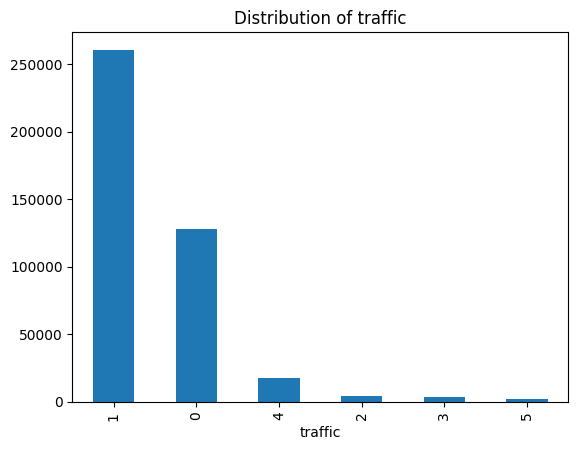

In [ ]:
train_2['traffic'].value_counts().plot.bar()
plt.title('Distribution of traffic')

Text(0.5, 1.0, 'Distribution of traffic')

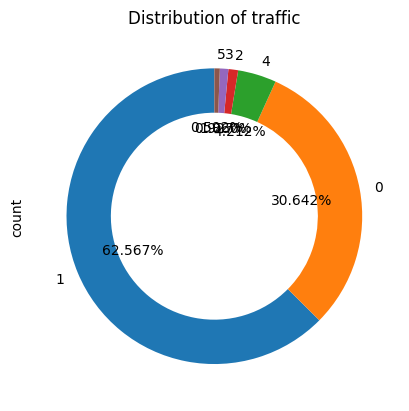

In [ ]:
train_2['traffic'].value_counts().plot.pie(autopct='%1.3f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of traffic')

#Modelling

In [ ]:
%%time
X = train_2.drop(['traffic', 'id'], axis = 1)
y = train_2['traffic']

display(X)

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,6.582229e+06,11238.921150,19466.666667,19466.666667,19695.443626,8949.000000,8949.000000,426.020916,60.000000,60.000000
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,53314,443,0.000155,28.153470,36.599511,7.853872,1.300000,0.0,0.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
416469,59005,53,0.000155,3.834435,80.762198,7.853872,1.000000,0.0,0.0,0.0,...,1.111949e+04,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259
416470,7978,443,0.000155,46.391519,3.247745,90.658236,0.954198,2.0,2.0,0.0,...,1.917931e+06,11238.921150,22572.608913,22572.608913,19695.443626,22687.991988,22687.991988,426.020916,1.275538,1.275538
416471,55784,80,0.000000,0.000000,0.000000,0.000000,0.847826,0.0,1.0,0.0,...,0.000000e+00,21114.804793,21048.202960,21054.502182,0.000000,0.000000,0.000000,21526.710475,21653.276956,21656.168187


CPU times: user 168 ms, sys: 108 ms, total: 276 ms
Wall time: 289 ms


In [ ]:
y

,traffic
0,0
1,0
2,0
3,1
4,1
...,...
416468,4
416469,1
416470,1
416471,1


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = SEED, test_size = 0.2)
X_train

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
17248,5678,5678,0.000155,0.000000,3.247745,0.000000,0.000000,0.0,0.0,0.0,...,1.683177e+07,322.288984,0.000000,0.000000,0.000000,0.000000,0.000000,310.569385,0.000000,0.000000
286269,49382,443,0.000155,65.411820,49.058865,7.853872,0.750000,2.0,2.0,0.0,...,1.203011e+06,11238.921150,21091.570248,21091.570248,19695.443626,48582.557851,48582.557851,426.020916,62.790909,62.790909
55288,35138,80,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,0.000000e+00,21114.804793,21048.202960,21054.502182,0.000000,0.000000,0.000000,21526.710475,21653.276956,21656.168187
386206,53265,161,0.000136,7345.541156,3.247745,14691.082312,0.847826,0.0,0.0,0.0,...,0.000000e+00,0.000000,17456.897208,0.000000,0.000000,2470.839575,0.000000,0.000000,15239.587772,0.000000
256308,42886,443,0.267264,33.674583,44.899444,78.574027,1.333333,1.0,2.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296784,26898,443,25.358232,0.867568,0.946438,1.814007,1.090909,0.0,0.0,3.0,...,1.108167e+07,11238.921150,22292.473118,22409.302326,19695.443626,47918.064516,47246.162791,426.020916,114.301075,77.279070
316642,52270,53,0.000155,75.904014,75.904014,7.853872,1.000000,0.0,0.0,0.0,...,1.111949e+04,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259
321852,53154,42001,0.000036,27776.847682,27776.847682,55553.695364,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
261973,43524,443,0.000155,28.253080,31.784716,60.037796,0.847826,1.0,0.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526


In [ ]:
X_val

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
355206,30556,53,0.024928,80.230766,80.230766,160.461533,1.000000,0.0,0.0,0.0,...,1.111949e+04,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259
407048,55714,42001,0.000059,3.834435,16912.516129,33825.032258,1.000000,0.0,1.0,1.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
331867,49317,1947,0.000155,3.834435,0.000000,0.000000,0.847826,0.0,0.0,0.0,...,6.105310e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
220055,15867,443,1.279719,8.595636,7.814215,7.853872,0.909091,0.0,2.0,2.0,...,0.000000e+00,11238.921150,18581.818182,18581.818182,19695.443626,12724.848485,12724.848485,426.020916,50.727273,50.727273
271745,62118,1947,0.000000,0.000000,0.000000,7.853872,0.847826,0.0,0.0,0.0,...,6.524408e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390294,63577,1947,0.000000,0.000000,3.247745,0.000000,0.000000,0.0,0.0,0.0,...,6.105310e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
368053,24398,80,0.000155,11.631539,7.754360,19.385899,0.666667,2.0,2.0,0.0,...,3.063783e+06,11238.921150,21752.902256,21760.481565,19695.443626,49156.177444,49163.577878,426.020916,46.281955,46.171708
35902,10572,53,0.000155,3.834435,70.571972,141.143944,1.000000,0.0,0.0,0.0,...,1.111949e+04,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259
359194,57750,42001,0.000155,3.834435,12052.597701,7.853872,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232


## Oversampling

In [ ]:
models_gpu = {
    'xgboostCla': xgb.XGBClassifier(random_state = SEED, objective= 'multi:softprob',
                                    num_class = 'len(set(y_train))',
                                    eval_metric = 'mlogloss', device = 'cuda'),
    'catboostCla': cb.CatBoostClassifier(verbose=0,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    boosting_type = 'Plain',
    grow_policy = 'Lossguide', random_state = SEED, task_type = 'GPU'),
}

In [ ]:
def model_comparison_imbl(X, y, X_train, y_train, models, samp, scaler, X_val, y_val ):
    result = {"metric": ["Balanced Accuracy Score", "Accuracy", "Precision", "Recall", "f1 score", 'score'#, 'cv_mean', 'cv'
                         ]}

    for name, model in models.items():
        model2 = ImbPipeline(steps=[
        ("scaler", scaler), ('over', samp),
        ('classifier', model)
        ])
        print(model2)
        model2.fit(X_train, y_train)
        pred = model2.predict(X_val)

        bas = balanced_accuracy_score(y_val, pred)
        acc = accuracy_score(y_val, pred)
        pre = precision_score(y_val, pred, average='macro')
        rec = recall_score(y_val, pred, average='macro')
        f1 = f1_score(y_val, pred, average='macro')
        score = (bas + acc)/2
        print(f"{name} score: {score}")

        result[name] = [bas, acc, pre, rec, f1, score#, cv_mean, cv
                        ]

    return pd.DataFrame(result)

In [ ]:
# hasil model setelah dilakukan random over sampling
%%time
model_compar_ros_gpu = model_comparison_imbl(X, y, X_train, y_train,
                                           models_gpu, RandomOverSampler(random_state = SEED),
                                           RobustScaler(), X_val, y_val,)
model_compar_ros_gpu

Pipeline(steps=[('scaler', RobustScaler()),
                ('over', RandomOverSampler(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_p...,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
              

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


xgboostCla score: 0.8609416678183683
Pipeline(steps=[('scaler', RobustScaler()),
                ('over', RandomOverSampler(random_state=42)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7af9ae807a30>)])
catboostCla score: 0.8684697191257296
CPU times: user 3min 5s, sys: 21.5 s, total: 3min 26s
Wall time: 3min 20s


,metric,xgboostCla,catboostCla
0,Balanced Accuracy Score,0.915604,0.930733
1,Accuracy,0.806279,0.806207
2,Precision,0.644510,0.617936
3,Recall,0.915604,0.930733
4,f1 score,0.734385,0.717294
5,score,0.860942,0.868470


In [ ]:
 ##Voting
%%time
estimator = [
    ('xgboostCla', xgb.XGBClassifier(random_state=SEED,objective= 'multi:softprob',
                                     num_class = len(set(y_train)),
                                     eval_metric = 'mlogloss', device = 'cuda')),
    ('catboostCla', cb.CatBoostClassifier(verbose=0, loss_function='MultiClass',
                                     eval_metric='MultiClass', boosting_type = 'Plain',
                                     grow_policy = 'Lossguide', random_state=SEED, task_type = 'GPU'))
]

voting_clf = VotingClassifier(estimators = estimator, voting='soft')
voting_clf2 = ImbPipeline(steps=[('over', RandomOverSampler(random_state=SEED)),
    ("scaler", RobustScaler()), ('classifier', voting_clf)
    ])

voting_clf2.fit(X_train, y_train)
display(voting_clf2)
pred = voting_clf2.predict(X_val)

acc = accuracy_score(y_val, pred)
print(f"accuracy score: {acc}")
bas = balanced_accuracy_score(y_val, pred)
print(f"Balanced accuracy score: {bas}")
pre = precision_score(y_val, pred, average='macro')
print(f"precision score: {pre}")
rec = recall_score(y_val, pred, average='macro')
print(f"recall score: {rec}")
f1 = f1_score(y_val, pred, average='macro')
print(f"f1 score: {f1}")
score = (acc + bas)/2
print(f"score kaggle train: {score}")

Pipeline(steps=[('over', RandomOverSampler(random_state=42)),
                ('scaler', RobustScaler()),
                ('classifier',
                 VotingClassifier(estimators=[('xgboostCla',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device='cuda',
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric='mlo...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_class=6,
                                                             num_parallel_tree=None, ...)),
                                              ('catboostCla',
                                               <catboost.core.CatBoostClassifier object at 0x7af9ae7fb7c0>)],
                                  voting='soft'))])

accuracy score: 0.809088180563059
Balanced accuracy score: 0.9290885270514729
precision score: 0.6321713687134243
recall score: 0.9290885270514729
f1 score: 0.7285997074338604
score kaggle train: 0.869088353807266
CPU times: user 2min 6s, sys: 24.1 s, total: 2min 30s
Wall time: 2min 12s


# Final Model

In [ ]:
X

,origin_port,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,...,idlefi_mean,forward_initial_window_sizeoh_mean,forward_initial_window_sizerh_mean,forward_initial_window_sizefi_mean,backward_initial_window_sizeoh_mean,backward_initial_window_sizerh_mean,backward_initial_window_sizefi_mean,forward_last_window_sizeoh_mean,forward_last_window_sizerh_mean,forward_last_window_sizefi_mean
0,45314,42001,0.000090,11125.474801,3.247745,22250.949602,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
1,45060,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,0.0,1.0,0.0,...,0.000000e+00,22788.462514,17456.897208,22791.544885,0.139299,2470.839575,0.000000,20297.144691,15239.587772,20299.791232
2,3440,443,61.977190,0.322699,0.242025,0.564724,0.750000,2.0,2.0,0.0,...,6.582229e+06,11238.921150,19466.666667,19466.666667,19695.443626,8949.000000,8949.000000,426.020916,60.000000,60.000000
3,56132,53,0.024249,3.834435,82.478178,164.956355,1.000000,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
4,43358,53,0.027580,3.834435,3.247745,72.516256,0.847826,0.0,0.0,0.0,...,4.825392e+03,11393.494828,12.008478,21.221676,24337.175474,2.699298,3.131909,528.636403,11.086494,21.221676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,53314,443,0.000155,28.153470,36.599511,7.853872,1.300000,0.0,0.0,1.0,...,1.543234e+05,11393.494828,21901.695835,21712.309286,24337.175474,48761.305199,48629.899699,528.636403,234.056681,274.494526
416469,59005,53,0.000155,3.834435,80.762198,7.853872,1.000000,0.0,0.0,0.0,...,1.111949e+04,11238.921150,12.008478,4.476940,19695.443626,2.699298,2.345650,426.020916,11.086494,2.801259
416470,7978,443,0.000155,46.391519,3.247745,90.658236,0.954198,2.0,2.0,0.0,...,1.917931e+06,11238.921150,22572.608913,22572.608913,19695.443626,22687.991988,22687.991988,426.020916,1.275538,1.275538
416471,55784,80,0.000000,0.000000,0.000000,0.000000,0.847826,0.0,1.0,0.0,...,0.000000e+00,21114.804793,21048.202960,21054.502182,0.000000,0.000000,0.000000,21526.710475,21653.276956,21656.168187


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Columns: 176 entries, origin_port to forward_last_window_sizefi_mean
dtypes: float64(154), int16(6), int32(3), int64(13)
memory usage: 540.2 MB
None


In [ ]:
%%time
estimator = [
    ('xgboostCla', xgb.XGBClassifier(random_state=SEED,objective= 'multi:softprob',
                                     num_class = 'len(set(y_train))',
                                     eval_metric = 'mlogloss', device = 'cuda')),
    ('catboostCla', cb.CatBoostClassifier(verbose=0, loss_function='MultiClass',
                                     eval_metric='MultiClass', boosting_type = 'Plain',
                                     grow_policy = 'Lossguide', random_state=SEED, task_type = 'GPU'))
]

voting_clf = VotingClassifier(estimators = estimator, voting='soft')
final_model = ImbPipeline(steps=[('over', RandomOverSampler(random_state=SEED)),
    ("scaler", RobustScaler()), ('classifier', voting_clf)
    ])

final_model
final_model.fit(X, y)

CPU times: user 2min 16s, sys: 25.8 s, total: 2min 41s
Wall time: 2min 21s


Pipeline(steps=[('over', RandomOverSampler(random_state=42)),
                ('scaler', RobustScaler()),
                ('classifier',
                 VotingClassifier(estimators=[('xgboostCla',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device='cuda',
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric='mlo...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_class='len(set(y_train))',
                                                             num_parallel_tree=None, ...)),
                                              ('catboostCla',
                                               <catboost.core.CatBoostClassifier object at 0x7b7f572183d0>)],
                                  voting='soft'))])

In [ ]:
import joblib

# Save the model to a file
model_filename = '/content/drive/MyDrive/lomba airnology 2024/final_model.pkl'
joblib.dump(final_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/lomba airnology 2024/final_model.pkl
